In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
crime = pd.read_csv("C:/Users/Akshay/Downloads/crime_data.csv")

In [8]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [11]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [12]:
crime = crime.drop('Unnamed: 0' , axis = 1)

In [13]:
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# Data visualization

<AxesSubplot:>

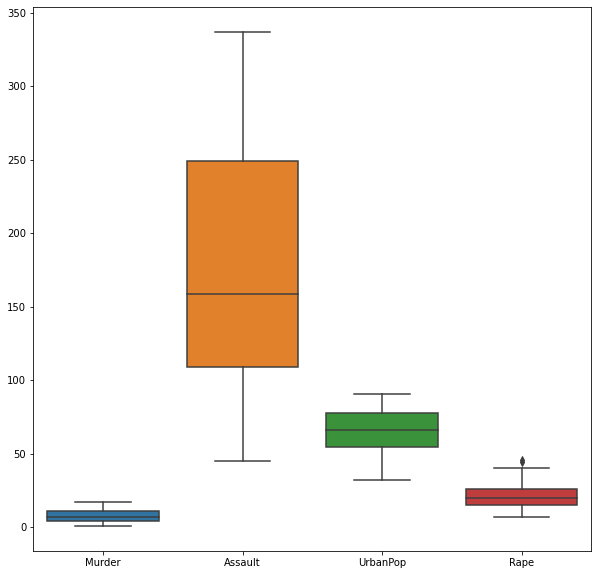

In [51]:
plt.figure(figsize = (10,10))
sns.boxplot(data = crime)

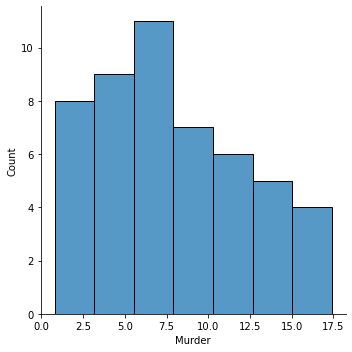

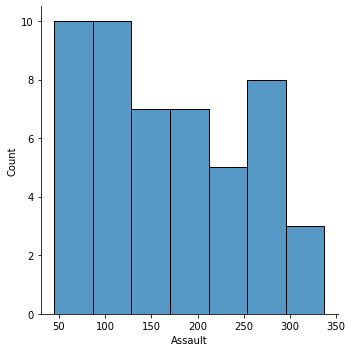

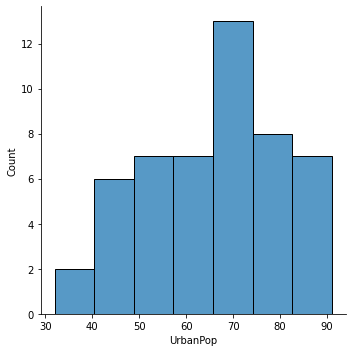

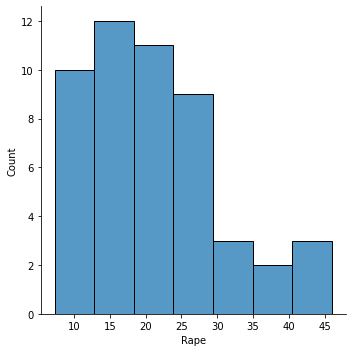

In [15]:
for i in crime.columns:
    sns.displot(crime[i])

# standardization of the data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
scaled = sc.fit_transform(crime)
scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# KMeans Clustering
finding best K value using elbow method

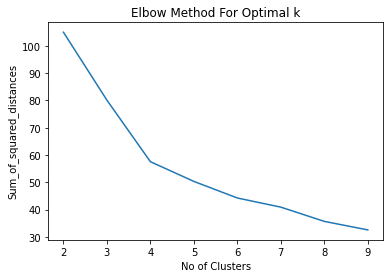

In [19]:
within_cluster_sum_squares = []

for i in range(2,10):
    k_means = KMeans(n_clusters = i , random_state = 42)
    k_means.fit(scaled)
    within_cluster_sum_squares.append(k_means.inertia_)
    
plt.plot(range(2,10) ,within_cluster_sum_squares)
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
k_means = KMeans(n_clusters = 4, random_state = 42)

In [21]:
pred = k_means.fit_predict(scaled)

In [22]:
pred

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [23]:
score = silhouette_score(scaled,pred)
score

0.33968891433344395

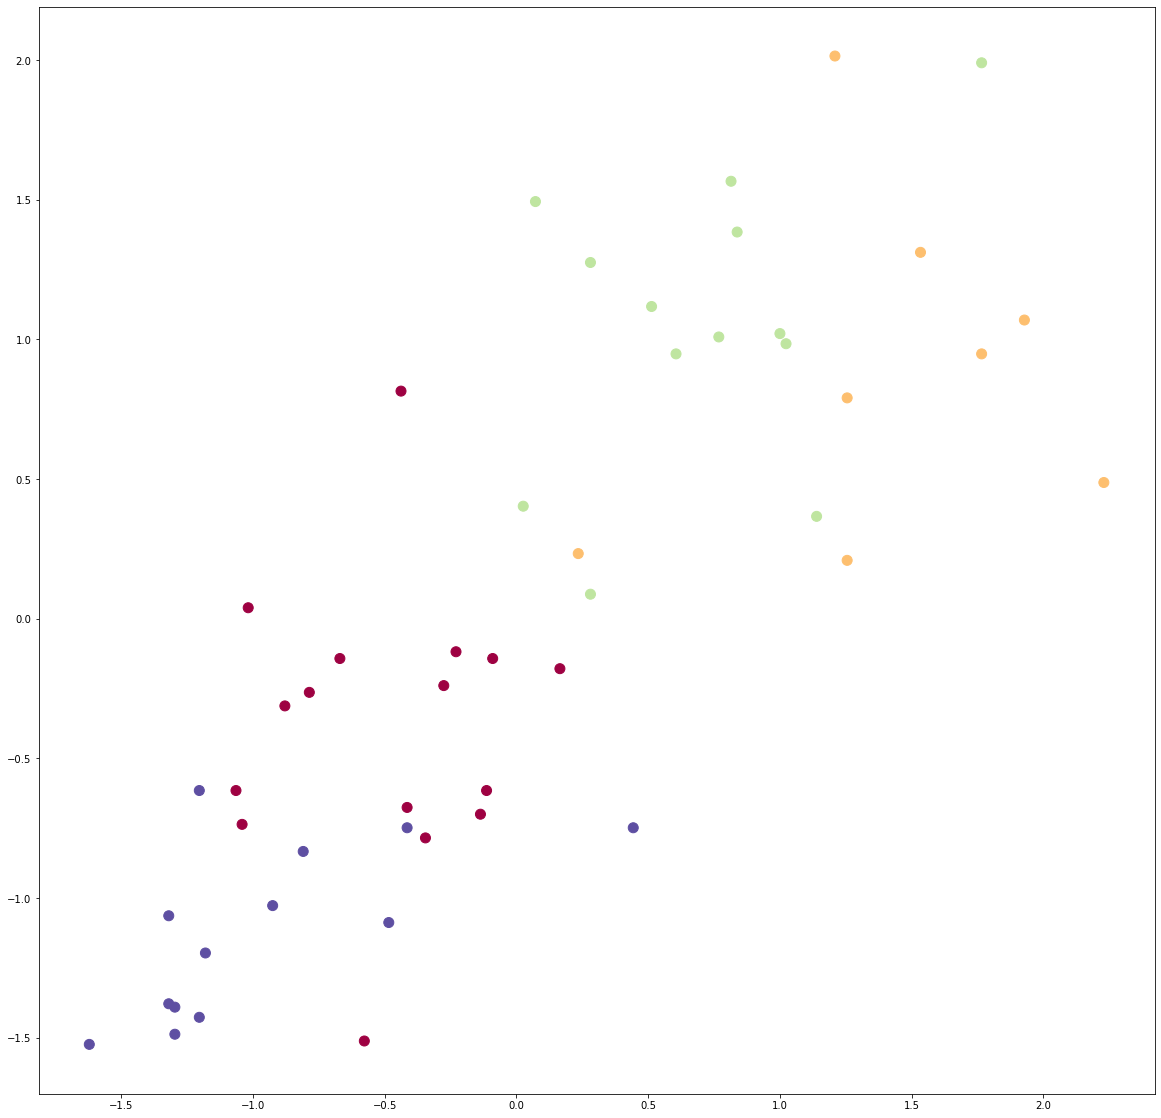

In [24]:
plt.figure(figsize = (20,20))
plt.scatter(scaled[:, 0], scaled[:, 1],c = pred,s=100, cmap='Spectral')

In [25]:
k_clusters = pd.DataFrame(pred , columns = ['kmeans_clusters'])
k_clusters

,kmeans_clusters
0,1
1,2
2,2
3,1
4,2
5,2
6,0
7,0
8,2
9,1


In [26]:
k_clusters['kmeans_clusters'].value_counts()

0    16
2    13
3    13
1     8
Name: kmeans_clusters, dtype: int64

# Agglomerative clustering
dendrogram to find ideal number of clusters

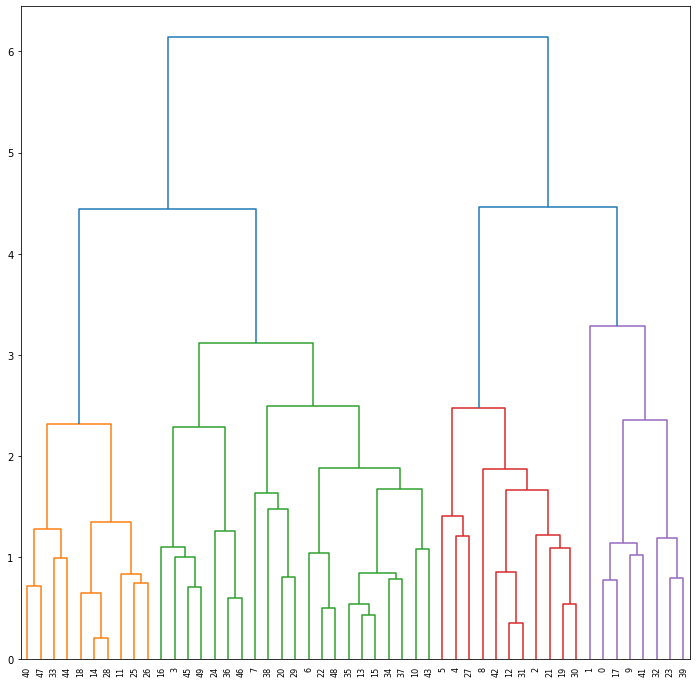

In [27]:
plt.figure(figsize = (12,12))
dendrogram = sch.dendrogram(sch.linkage(scaled , method = 'complete'))

In [28]:
agg = AgglomerativeClustering(n_clusters = 4 , linkage = 'complete' , affinity = 'euclidean')

In [29]:
pred2 = agg.fit_predict(scaled)

In [30]:
pred2

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [31]:
score = silhouette_score(scaled,pred2)
score

0.31595507426164543

In [32]:
agg2 = AgglomerativeClustering(n_clusters = 4 , linkage = 'average' , affinity = 'euclidean')
preds = agg2.fit_predict(scaled)
score = silhouette_score(scaled,preds)
score

0.3636819420151221

In [33]:
agg2 = AgglomerativeClustering(n_clusters = 2 , linkage = 'complete' , affinity = 'euclidean')
pred3 = agg2.fit_predict(scaled)
score = silhouette_score(scaled,pred3)
score

0.4047944502519567

In [34]:
agg2 = AgglomerativeClustering(n_clusters = 2 , linkage = 'average' , affinity = 'euclidean')
pred3 = agg2.fit_predict(scaled)
score = silhouette_score(scaled,pred3)
score

0.4084890326217641

In [35]:
pred3

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
#selecting average linkage with number of clusters as 2 as it gives a higher silhouette score

In [36]:
Agg_clusters = pd.DataFrame(pred3 , columns = ['AggClusters'])
Agg_clusters

,AggClusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [37]:
Agg_clusters['AggClusters'].value_counts()

1    30
0    20
Name: AggClusters, dtype: int64

# DBSCAN CLUSTERING

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
eps_range = [0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]

In [40]:
for i in eps_range:
    dbscan = DBSCAN(eps = i , min_samples = 3)
    pred = dbscan.fit_predict(scaled)
    score = silhouette_score(scaled,pred)
    print('when eps =',i , 'score=' , score)

when eps = 0.6 score= -0.19684532154066225
when eps = 0.7 score= -0.09867491985225028
when eps = 0.8 score= -0.03918861150172155
when eps = 0.9 score= 0.050538078929710656
when eps = 1 score= 0.1929097582325484
when eps = 1.1 score= 0.28523184583363054
when eps = 1.2 score= 0.2677430171383357
when eps = 1.3 score= 0.21748053800224604
when eps = 1.4 score= 0.234555987531598
when eps = 1.5 score= 0.234555987531598
when eps = 1.6 score= 0.234555987531598
when eps = 1.7 score= 0.234555987531598
when eps = 1.8 score= 0.234555987531598
when eps = 1.9 score= 0.234555987531598
when eps = 2 score= 0.234555987531598


In [41]:
for i in eps_range:
    dbscan = DBSCAN(eps = i , min_samples = 4)
    pred = dbscan.fit_predict(scaled)
    score = silhouette_score(scaled,pred)
    print('when eps =',i , 'score=' , score)

when eps = 0.6 score= -0.1366691851063249
when eps = 0.7 score= -0.0655889762635692
when eps = 0.8 score= 0.19671925471369056
when eps = 0.9 score= 0.2667819160704821
when eps = 1 score= 0.20511549193219994
when eps = 1.1 score= 0.2634404276735934
when eps = 1.2 score= 0.2677430171383357
when eps = 1.3 score= 0.23506313886168034
when eps = 1.4 score= 0.234555987531598
when eps = 1.5 score= 0.234555987531598
when eps = 1.6 score= 0.234555987531598
when eps = 1.7 score= 0.234555987531598
when eps = 1.8 score= 0.234555987531598
when eps = 1.9 score= 0.234555987531598
when eps = 2 score= 0.234555987531598


In [42]:
for i in eps_range:
    dbscan = DBSCAN(eps = i , min_samples = 5)
    pred = dbscan.fit_predict(scaled)
    score = silhouette_score(scaled,pred)
    print('when eps =',i , 'score=' , score)

when eps = 0.6 score= -0.14683369188860532
when eps = 0.7 score= -0.11411918739912115
when eps = 0.8 score= 0.07372215328040937
when eps = 0.9 score= 0.2667819160704821
when eps = 1 score= 0.19486631995858558
when eps = 1.1 score= 0.3907373331499921
when eps = 1.2 score= 0.27881927066240825
when eps = 1.3 score= 0.23290181596058246
when eps = 1.4 score= 0.234555987531598
when eps = 1.5 score= 0.234555987531598
when eps = 1.6 score= 0.234555987531598
when eps = 1.7 score= 0.234555987531598
when eps = 1.8 score= 0.234555987531598
when eps = 1.9 score= 0.234555987531598
when eps = 2 score= 0.234555987531598


In [ ]:
# choosing parameters that gives higher silhouette score

In [43]:
dbscan = DBSCAN(eps = 1.1 , min_samples = 5)
pred = dbscan.fit_predict(scaled)
score = silhouette_score(scaled,pred)

In [44]:
pred

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [45]:
score

0.3907373331499921

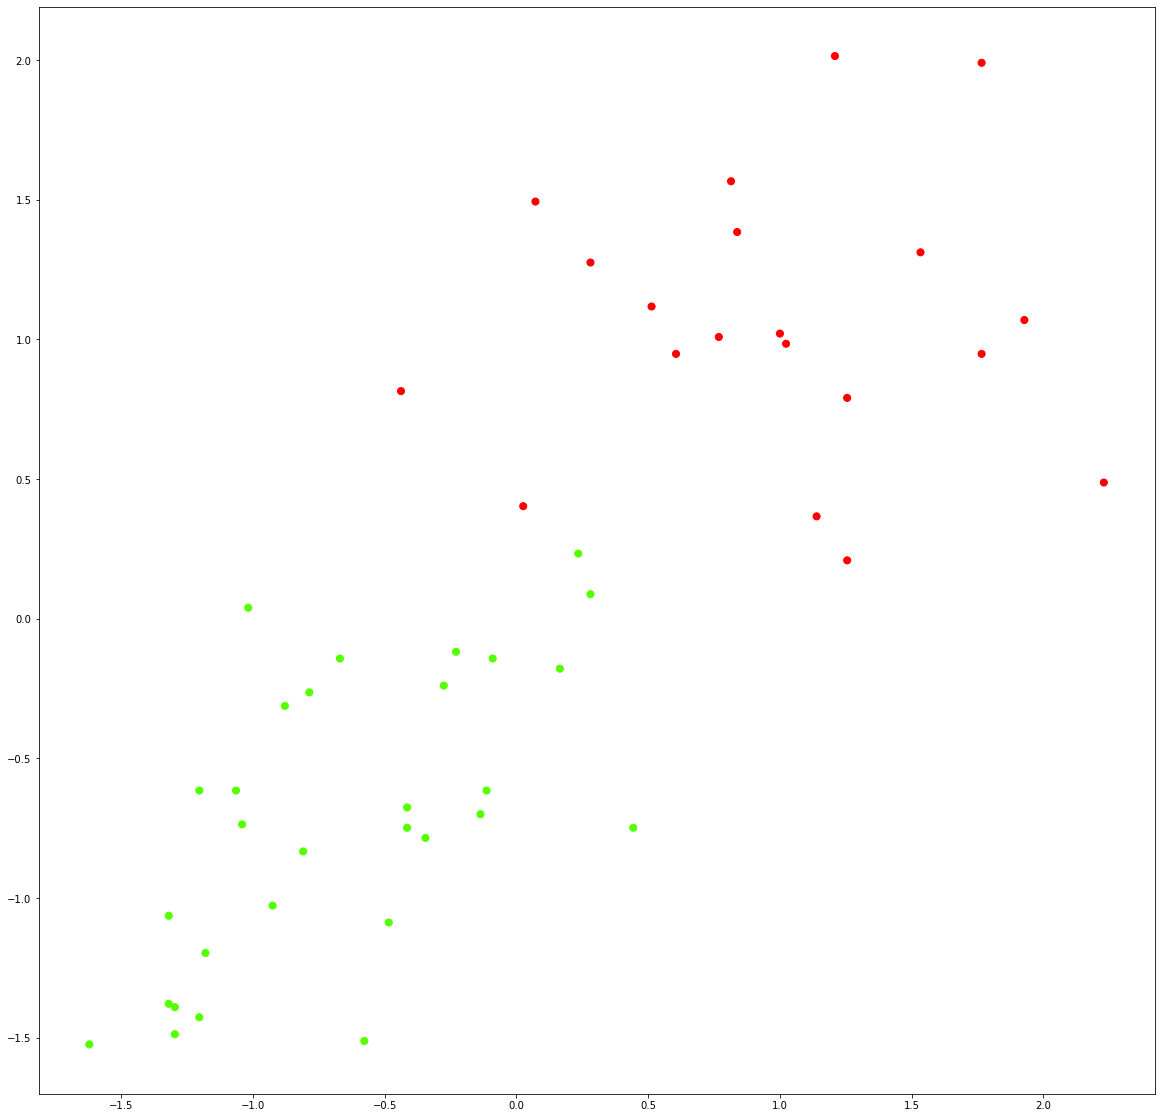

In [46]:
plt.figure(figsize=(20,20))
plt.scatter(scaled[:,0],scaled[:,1] , s=50 , c=pred , cmap = 'prism')

In [47]:
DB_clusters = pd.DataFrame(pred , columns = ['DBClusters'])
DB_clusters

,DBClusters
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [48]:
DB_clusters['DBClusters'].value_counts()

 0    30
-1    20
Name: DBClusters, dtype: int64

In [49]:
crime_clusters = pd.concat([crime,k_clusters,Agg_clusters,DB_clusters] , axis = 1)

In [50]:
crime_clusters

,Murder,Assault,UrbanPop,Rape,kmeans_clusters,AggClusters,DBClusters
0,13.2,236,58,21.2,1,0,-1
1,10.0,263,48,44.5,2,0,-1
2,8.1,294,80,31.0,2,0,-1
3,8.8,190,50,19.5,1,1,0
4,9.0,276,91,40.6,2,0,-1
5,7.9,204,78,38.7,2,0,-1
6,3.3,110,77,11.1,0,1,0
7,5.9,238,72,15.8,0,1,-1
8,15.4,335,80,31.9,2,0,-1
9,17.4,211,60,25.8,1,0,-1


In [ ]:
# Agglomerative clustering gave a good silhouette score when 2 clusters were considered with average linkage , 60% of the data went into one cluster and remining data into another
#KMeans clustering gave a good score when 4 clusters were formed using elbow plot , 30% of the data went into cluster 0 while 26 % of data went into cluster 1 and 2 each , remaining into cluster 3
# Using DBSCAN clustering , clustered 60 %  of the data into one cluster